## In this project, I will be training a neural network for classifying imdb reviews for movies as good or bad


In [19]:
g = open('reviews.txt','r')
reviews = list(map(lambda x : x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r')
labels = list(map(lambda x : x[:-1].upper(),g.readlines()))
g.close()

In [20]:
def pretty_print_review_and_label(index):
    print(labels[index]+ "\t : \t"+ reviews[index][:80]+"...")
    
for i in range(20):
    
    pretty_print_review_and_label(i)

POSITIVE	 : 	bromwell high is a cartoon comedy . it ran at the same time as some other progra...
NEGATIVE	 : 	story of a man who has unnatural feelings for a pig . starts out with a opening ...
POSITIVE	 : 	homelessness  or houselessness as george carlin stated  has been an issue for ye...
NEGATIVE	 : 	airport    starts as a brand new luxury    plane is loaded up with valuable pain...
POSITIVE	 : 	brilliant over  acting by lesley ann warren . best dramatic hobo lady i have eve...
NEGATIVE	 : 	this film lacked something i couldn  t put my finger on at first charisma on the...
POSITIVE	 : 	this is easily the most underrated film inn the brooks cannon . sure  its flawed...
NEGATIVE	 : 	sorry everyone    i know this is supposed to be an  art  film   but wow  they sh...
POSITIVE	 : 	this is not the typical mel brooks film . it was much less slapstick than most o...
NEGATIVE	 : 	when i was little my parents took me along to the theater to see interiors . it ...
POSITIVE	 : 	this isn  t the c

In [21]:
from collections import Counter
import numpy as np

In [22]:
positive_counts = Counter()# to count the frequency of each word in positve review
negative_counts = Counter()#to count the frequency of each word in positve review
total_counts = Counter() #to maintain total count of each word in the review

In [24]:
for i in range(len(reviews)):
    if(labels[i]=="POSITIVE"):
        for word in reviews[i].split(" "):
            positive_counts[word]+=1
            total_counts[word]+=1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word]+=1
            total_counts[word]+=1

In [25]:
positive_counts.most_common(10)

[('', 1100936),
 ('the', 346648),
 ('.', 319308),
 ('and', 179444),
 ('a', 167376),
 ('of', 153710),
 ('to', 133492),
 ('is', 114490),
 ('in', 100430),
 ('br', 98470)]

In [26]:
negative_counts.most_common(10)

[('', 1122924),
 ('.', 335076),
 ('the', 326778),
 ('a', 158642),
 ('and', 148770),
 ('of', 138018),
 ('to', 137948),
 ('br', 105274),
 ('is', 100166),
 ('it', 96654)]

In [27]:
pos_neg_ratios = Counter()

for term, count in list(total_counts.most_common()):
    if(count> 10):
        pos_neg_ratio = positive_counts[term]/float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio
for word, ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1 / (ratio+0.01)))

In [29]:
pos_neg_ratios.most_common(10)

[('edie', 5.3844950627890888),
 ('antwone', 5.1704839950381514),
 ('din', 5.0998664278241987),
 ('gunga', 4.8828019225863706),
 ('goldsworthy', 4.8675344504555822),
 ('yokai', 4.7874917427820458),
 ('gypo', 4.7874917427820458),
 ('visconti', 4.6249728132842707),
 ('flavia', 4.6249728132842707),
 ('kells', 4.5643481914678361)]

#Tokenizing words of the reviews and labels.


In [32]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)

print(vocab_size)

74074


In [49]:
import numpy as np
layer_0 = np.zeros((1,vocab_size))
layer_0

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [52]:
word2index = { } 
for index,word in enumerate(vocab):
    word2index[word] = index
list(word2index.keys())[:20]

['',
 'nonfunctioning',
 'flatman',
 'picturesque',
 'ped',
 'arteries',
 'greeter',
 'cliffs',
 'jesminder',
 'farcelike',
 'mcgowan',
 'grierson',
 'disingenious',
 'bogeymen',
 'cave',
 'needham',
 'intellectually',
 'schoolhouse',
 'cyril',
 'replicant']

In [53]:
def update_input_layer(review):
    global layer_0 
    layer_0*=0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1
update_input_layer(reviews[0])

In [54]:
def get_target_for_label(label):
    if(label == 'POSITIVE'):
        return 1
    else: 
        return 0

Building the Neural Network

In [55]:
# Quick numpy.random.normal tutorial:
# np.random.normal(mean, std_deviation, size) creates an array with elements in normal distribution.
mu,sigma = 10,0.1
s = np.random.normal(mu,sigma,size=100000)
#print(s)

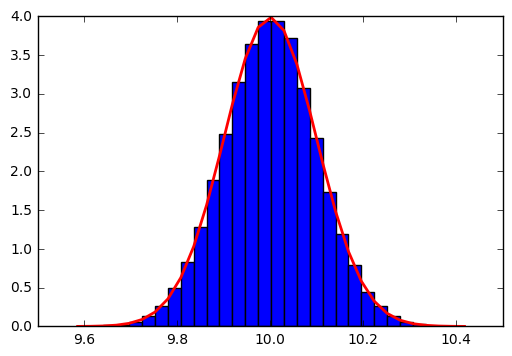

In [56]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

In [57]:
import time
import sys
import numpy as np
# Tweaking our network from before to model these phenomena
class NeuralNetwork():
    def __init__(self,reviews,labels,hidden_nodes = 10, learning_rate = 0.01):
        #set our random number generator
        np.random.seed(1)
        # calling preprocess_data function
        self.preprocess_data(reviews, labels)
        
        self.initialize_network(len(self.review_vocab),hidden_nodes,1,learning_rate)
        
    
    def preprocess_data(self,reviews, labels):
        # creating a set of words from all the reviews.
        review_vocab = set()
        for review in reviews:
            for word in reviews.split(" "):
                review_vocab.add(word)
        #exporting the set created above as a list variable that is a class variable.        
        self.review_vocab = list(review_vocab)
        
        # similar to the above procedure, we will now create a set of labels and export it to 
        # self.label_vocab class variable
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        self.label_vocab = list(label_vocab)
        
        # size of the review vocabulary 
        self.review_vocab_size = len(self.review_vocab)
        
        # size of the label vocabulary
        self.label_vocab_size = len(self.label_vocab)
        
        # creating a dictionary with words and mapping them to numbers
        self.word2index = {}
        for word, index in enumerate(self.review_vocab):
            self.word2index[word] = index
        
        # creating a dictionary with labels and mapping them to numbers. 
        self.label2index = { }
        for label, index in enumerate(self.label_vocab):
            self.label2index [label] = index
                
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5,
                                            (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
    
    def update_input_layer(self,review): #--> resets the input layer for each review. 
         # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1
    
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self,training_reviews, training_labels):
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        for i in range(len(training_reviews)):
            review = training_reviews[i]
            label = training_labels[i]
            
            ## forward pass
            
            #input layer 
            self.update_input_layer(review)
            
            #hidden layer
            layer_1 = layer_0.dot(self.weights_0_1)
            
            #output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
            
            ### Backward Pass: